# Lab | Imbalanced data

In [1]:
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

 ### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

5696-QURRL    1
8178-EYZUO    1
7696-CFTAT    1
4990-ALDGW    1
9558-IHEZX    1
             ..
5956-VKDTT    1
4186-ZBUEW    1
5777-KJIRB    1
3125-RAHBV    1
1821-BUCWY    1
Name: customerID, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DevicePro

### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

### 3. Extract the target variable.

In [8]:
y1 = data['Churn']
y1.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

### 4. Extract the independent variables and scale them.

In [9]:
X1 = data.select_dtypes(np.number)
X1.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


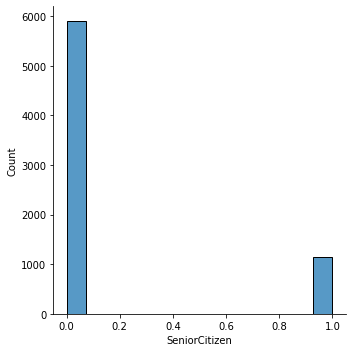

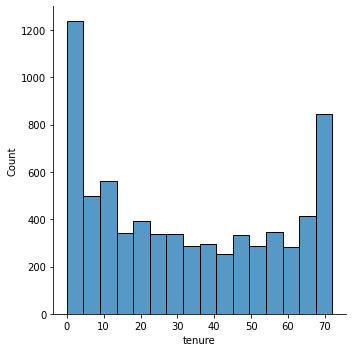

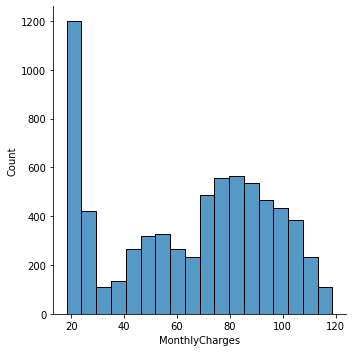

In [10]:
for col in X1.select_dtypes(np.number):
    sns.displot(X1[col])
    plt.show()

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


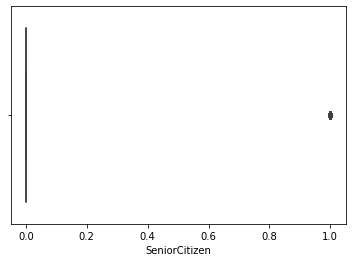

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


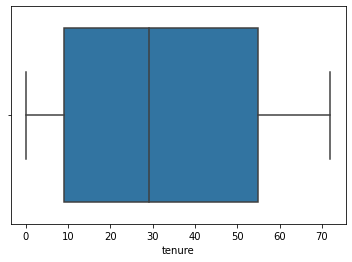

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


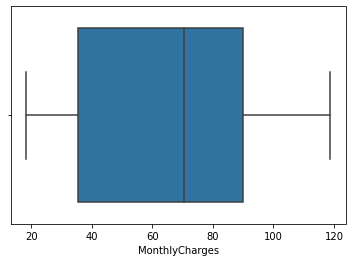

In [11]:
for col in X1:
    sns.boxplot(X1[col])
    plt.show()

### 5. Build the logistic regression model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=13)

In [13]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### 6. Evaluate the model.

In [14]:
classification.score(X_test, y_test)

0.7877927608232789

In [15]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[949,  99],
       [200, 161]], dtype=int64)

<AxesSubplot:>

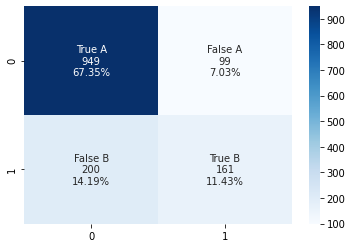

In [16]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
from sklearn import metrics

In [18]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.86      1048
         Yes       0.62      0.45      0.52       361

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.79      0.78      1409



### 7. Even a simple model will give us more than 70% accuracy. Why?

In [19]:
y1.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

--> high accuracy of the model because of a highly imbalanced target variable! The model more often predicts 'No' because this is shown a lot more in the dataset.

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [20]:
!pip install imblearn

You should consider upgrading via the 'c:\users\katha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X2 = X1
y2 = y1

X2, y2 = smote.fit_resample(X1, y1)
y2.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=13)

In [23]:
classification = LogisticRegression(random_state=13, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=13)

In [24]:
classification.score(X_test, y_test)

0.7207729468599033

In [25]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[771, 296],
       [282, 721]], dtype=int64)

<AxesSubplot:>

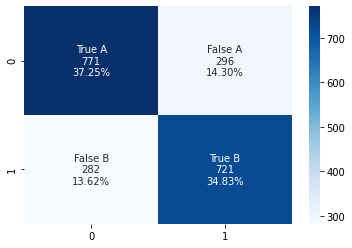

In [26]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [27]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.73      0.72      0.73      1067
         Yes       0.71      0.72      0.71      1003

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070



### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [28]:
from imblearn.under_sampling import TomekLinks

X3 = X1
y3 = y1

tomek = TomekLinks()
X3, y3 = tomek.fit_resample(X1, y1)
y3.value_counts()

No     4711
Yes    1869
Name: Churn, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=13)

In [30]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [31]:
classification.score(X_test, y_test)

0.8031914893617021

In [32]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[870,  89],
       [170, 187]], dtype=int64)

<AxesSubplot:>

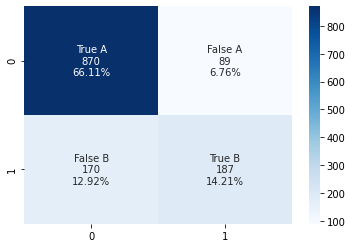

In [33]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [34]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       959
         Yes       0.68      0.52      0.59       357

    accuracy                           0.80      1316
   macro avg       0.76      0.72      0.73      1316
weighted avg       0.79      0.80      0.79      1316

